In [1]:
#dependences
import pandas as pd
import numpy as np

#visualizations
import seaborn as sns
from pathlib import Path
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import linregress

# statistic tests ans regressions
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import mannwhitneyu # test for not normally distribution

In [2]:

# Define the path to the CSV file
file = "Resources/uk_gov_data_sparse_preproc.csv"

# Read the CSV file into a DataFrame
df_raw = pd.read_csv(file, encoding="ISO-8859-1")

# Create a copy of the DataFrame


# Display the first 4 rows of the DataFrame
df_raw.head()

,car_id,manufacturer,model,description,transmission,transmission_type,engine_size_cm3,fuel,powertrain,power_ps,co2_emissions_gPERkm
0,1.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,161.0
1,2.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,153.0
2,3.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0
3,4.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,162.0
4,5.0,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0


In [3]:
# look at missing value
df_raw.isnull().sum()

car_id                    0
manufacturer              0
model                     0
description               0
transmission            147
transmission_type         0
engine_size_cm3           1
fuel                      0
powertrain                0
power_ps                 44
co2_emissions_gPERkm      0
dtype: int64

In [4]:
# look at duplcated value
df_raw.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6751    False
6752    False
6753    False
6754    False
6755    False
Length: 6756, dtype: bool

In [5]:
# Locate, Identify, and drop car ID's with an electric transmission (they dont emit co2)
e_transmission_i = df_raw[(df_raw.transmission_type == "Electric - Not Applicable")].index
df_emissions_raw = df_raw.drop(e_transmission_i)
df_emissions_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6654 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6654 non-null   float64
 1   manufacturer          6654 non-null   object 
 2   model                 6654 non-null   object 
 3   description           6654 non-null   object 
 4   transmission          6608 non-null   object 
 5   transmission_type     6654 non-null   object 
 6   engine_size_cm3       6654 non-null   float64
 7   fuel                  6654 non-null   object 
 8   powertrain            6654 non-null   object 
 9   power_ps              6618 non-null   float64
 10  co2_emissions_gPERkm  6654 non-null   float64
dtypes: float64(4), object(7)
memory usage: 623.8+ KB


In [6]:
null_ps = df_emissions_raw[(df_emissions_raw.power_ps == 0)].index
df_emissions = df_emissions_raw.drop(null_ps)
df_emissions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6642 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6642 non-null   float64
 1   manufacturer          6642 non-null   object 
 2   model                 6642 non-null   object 
 3   description           6642 non-null   object 
 4   transmission          6597 non-null   object 
 5   transmission_type     6642 non-null   object 
 6   engine_size_cm3       6642 non-null   float64
 7   fuel                  6642 non-null   object 
 8   powertrain            6642 non-null   object 
 9   power_ps              6606 non-null   float64
 10  co2_emissions_gPERkm  6642 non-null   float64
dtypes: float64(4), object(7)
memory usage: 622.7+ KB


In [7]:
df_emissions1 = df_emissions.dropna(subset=["power_ps"])
df_emissions1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6606 non-null   float64
 1   manufacturer          6606 non-null   object 
 2   model                 6606 non-null   object 
 3   description           6606 non-null   object 
 4   transmission          6563 non-null   object 
 5   transmission_type     6606 non-null   object 
 6   engine_size_cm3       6606 non-null   float64
 7   fuel                  6606 non-null   object 
 8   powertrain            6606 non-null   object 
 9   power_ps              6606 non-null   float64
 10  co2_emissions_gPERkm  6606 non-null   float64
dtypes: float64(4), object(7)
memory usage: 619.3+ KB


In [8]:
null_emissions = df_emissions1[(df_emissions1.co2_emissions_gPERkm == 0)].index
df_emissions_clean = df_emissions1.drop(null_emissions)
df_emissions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6542 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6542 non-null   float64
 1   manufacturer          6542 non-null   object 
 2   model                 6542 non-null   object 
 3   description           6542 non-null   object 
 4   transmission          6542 non-null   object 
 5   transmission_type     6542 non-null   object 
 6   engine_size_cm3       6542 non-null   float64
 7   fuel                  6542 non-null   object 
 8   powertrain            6542 non-null   object 
 9   power_ps              6542 non-null   float64
 10  co2_emissions_gPERkm  6542 non-null   float64
dtypes: float64(4), object(7)
memory usage: 613.3+ KB


In [9]:
##Question 3: Are CO2 emissions different depending on the type of vehicle transmission?

In [10]:
## Descriptive data 

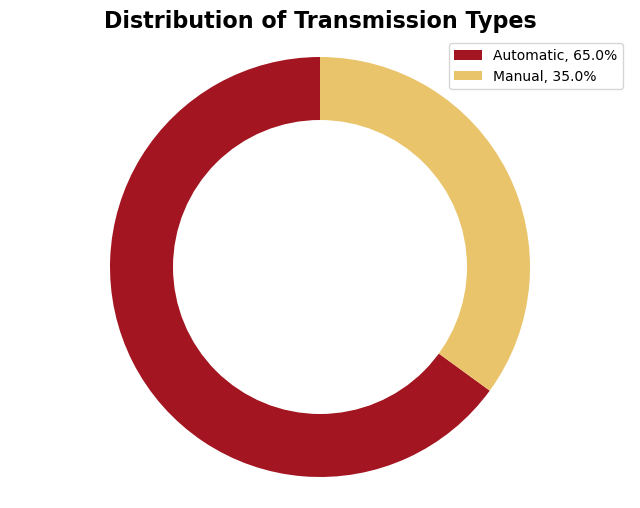

In [11]:
# Step 1: Get the data
data = df_emissions_clean.transmission_type.value_counts()
colors = ["#a31621", "#e9c46a", "#5579c6", "#1f7a8c", "#db222a", "#708238", "#a8e4a0"]
# Step 2: Make the canvas
plt.figure(figsize=(8, 6))

# Step 3: Make the plot
patches, texts = plt.pie(data, colors=colors, shadow=False, startangle=90)

# Step 3.5: Add in the donut hole
# draw circle
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

# finding percentages
percentages = data.to_numpy() * 100 / data.to_numpy().sum()

# Step 4: Customizations
plt.title("Distribution of Transmission Types", fontweight="bold", fontsize=16)
plt.legend(handles=patches, loc="best", labels = [f'{l}, {s:0.1f}%' for l, s in zip(data.index, percentages)])
plt.axis("equal")

# Step 5: Save/Show
plt.show()

In [12]:
data.head()

transmission_type
Automatic    4251
Manual       2291
Name: count, dtype: int64

In [13]:
# Identify distribution of data
transmission_types = df_emissions_clean['transmission_type'].unique()
transmission_types

for transmission in transmission_types:
    data = df_emissions_clean[df_emissions_clean['transmission_type'] != transmission]['co2_emissions_gPERkm']
        
        # Test for normality using Shapiro-Wilk test
    stat, p = stats.shapiro(data)
    alpha = 0.05
    if p > alpha:
     print(f"CO2 emissions for {transmission} transmission type are normally distributed")
    else:
     print(f"CO2 emissions for {transmission} transmission type are not normally distributed")

CO2 emissions for Manual transmission type are not normally distributed
CO2 emissions for Automatic transmission type are not normally distributed


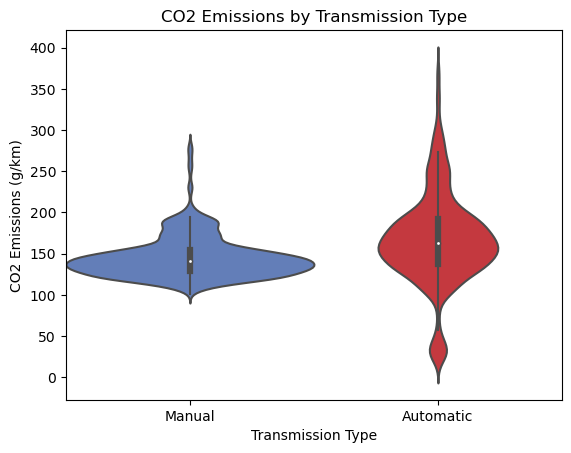

In [14]:
sns.violinplot(x='transmission_type', y='co2_emissions_gPERkm', data=df_emissions_clean,width=1, palette=["#5579c6","#db222a"])
plt.title('CO2 Emissions by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

In [15]:
# Separate data by transmission type
manual = df_emissions_clean[df_emissions_clean['transmission_type'] == 'Manual']['co2_emissions_gPERkm']
automatic =df_emissions_clean[df_emissions_clean["transmission_type"] == "Automatic"]['co2_emissions_gPERkm']

In [16]:
#Mann-Whitney U test: Suitable for comparing the distributions of two independent groups
u_stat, u_p_value = mannwhitneyu(manual, automatic)
print(f'Mann-Whitney U test: U statistic={u_stat}, p-value={u_p_value}')

Mann-Whitney U test: U statistic=3228420.0, p-value=2.5442776070750575e-112


In [17]:
### Discussion of Mann-Whitney U test 
###The test result gives information that there is a highly significant difference in CO2 emissions between manual and automatic transmissions. This implies that the type of transmission has a substantial impact on CO2 emissions. 